# K-Means Clusterin - Scikit-Learn

În partea trecută am aflat noțiuni teoretice despre K-Means clustering, iar acum o să începem să explorăm acest model cu Scikit-Learn. O să începem cu o explorare a setului de date cu care o să avem de lucrat pe parcursul acestei părți

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/DATA/bank-full.csv')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Datele din acest set de date fac referire la anumiți clienți a unor bănci. Ceea ce o să încercăm să facem cu acest algoritm de K-Means Clustering este să grupăm acești clienți a băncilor în câteva clustere.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Din moment ce pentru acest set de date nu avem un label la care să ne referim este important să avem cunoștințe în domeniul din care sunt preluate datele, sau dacă nu să apelăm la cineva care are o astfel de exeperiență.

<AxesSubplot:xlabel='age', ylabel='Count'>

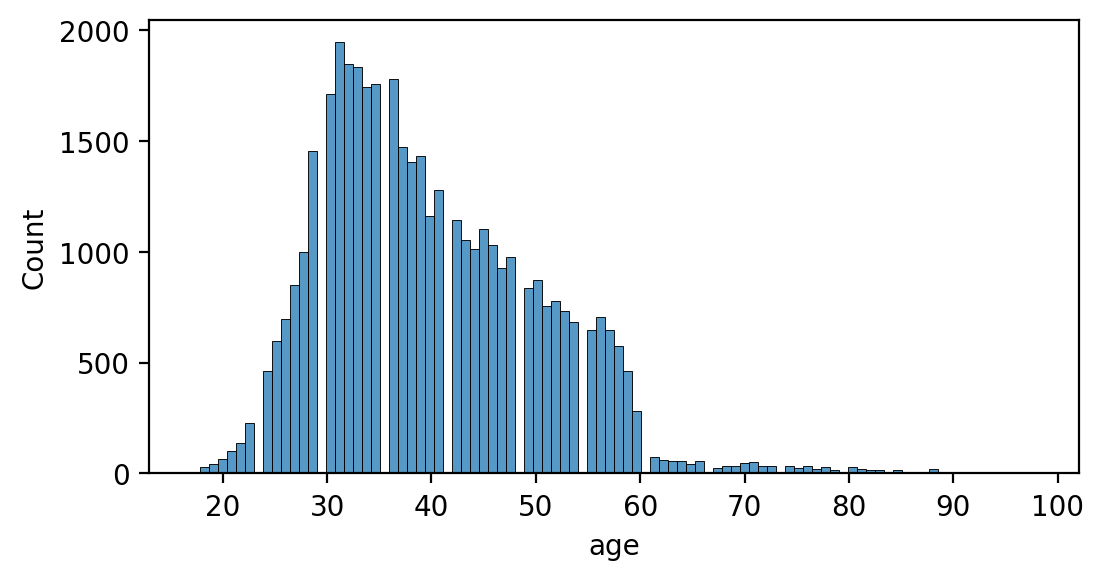

In [6]:
plt.figure(figsize=(6, 3), dpi=200)
sns.histplot(data=df, x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

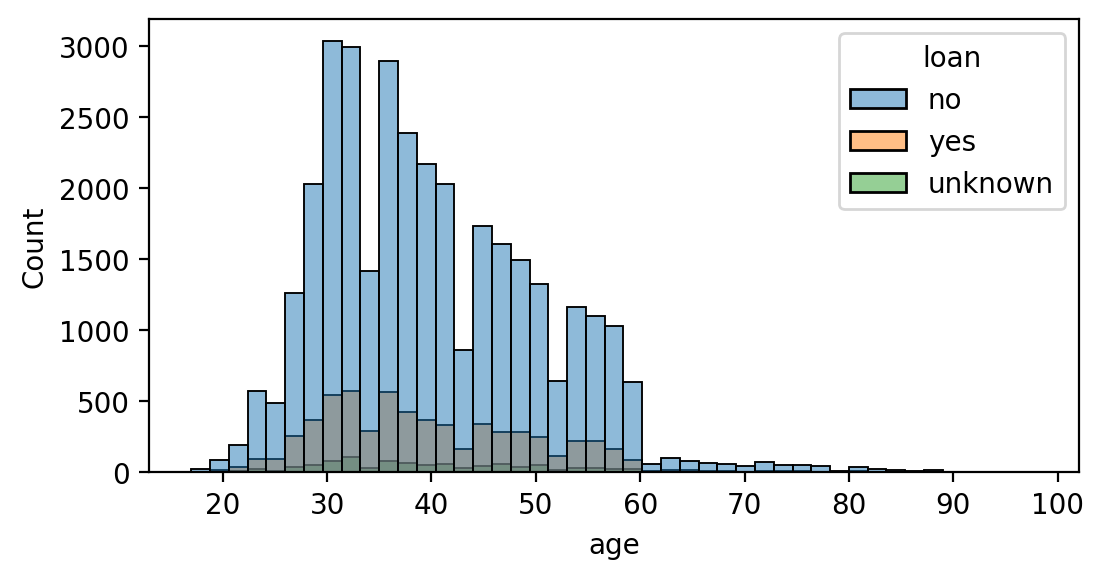

In [7]:
plt.figure(figsize=(6, 3), dpi=200)
sns.histplot(data=df, x='age', bins=45, hue='loan')

In [8]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

<AxesSubplot:xlabel='duration', ylabel='Count'>

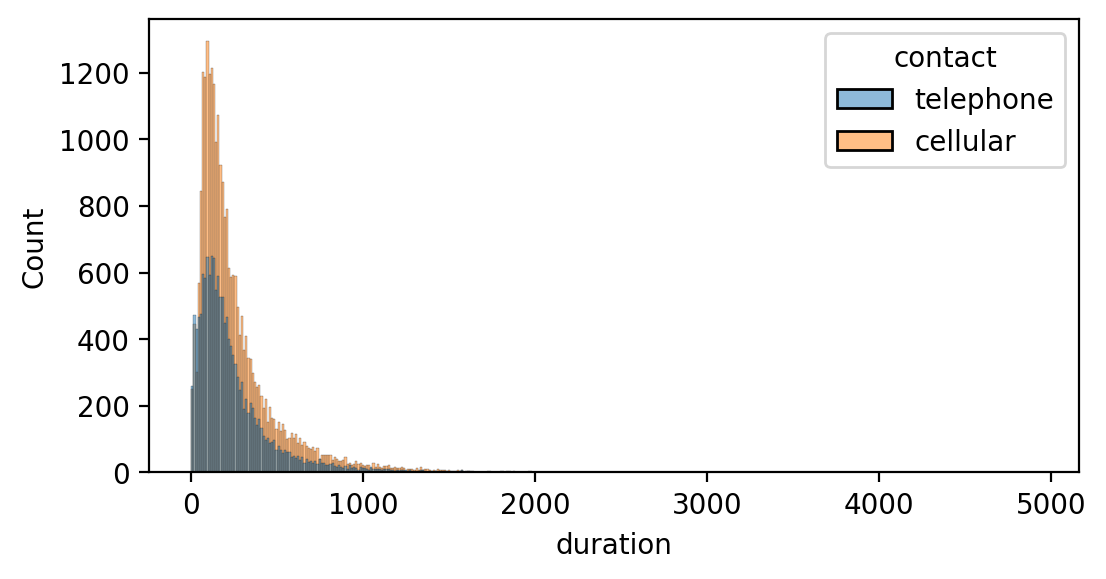

In [10]:
plt.figure(figsize=(6, 3), dpi=200)
sns.histplot(data=df, x='duration', hue='contact')

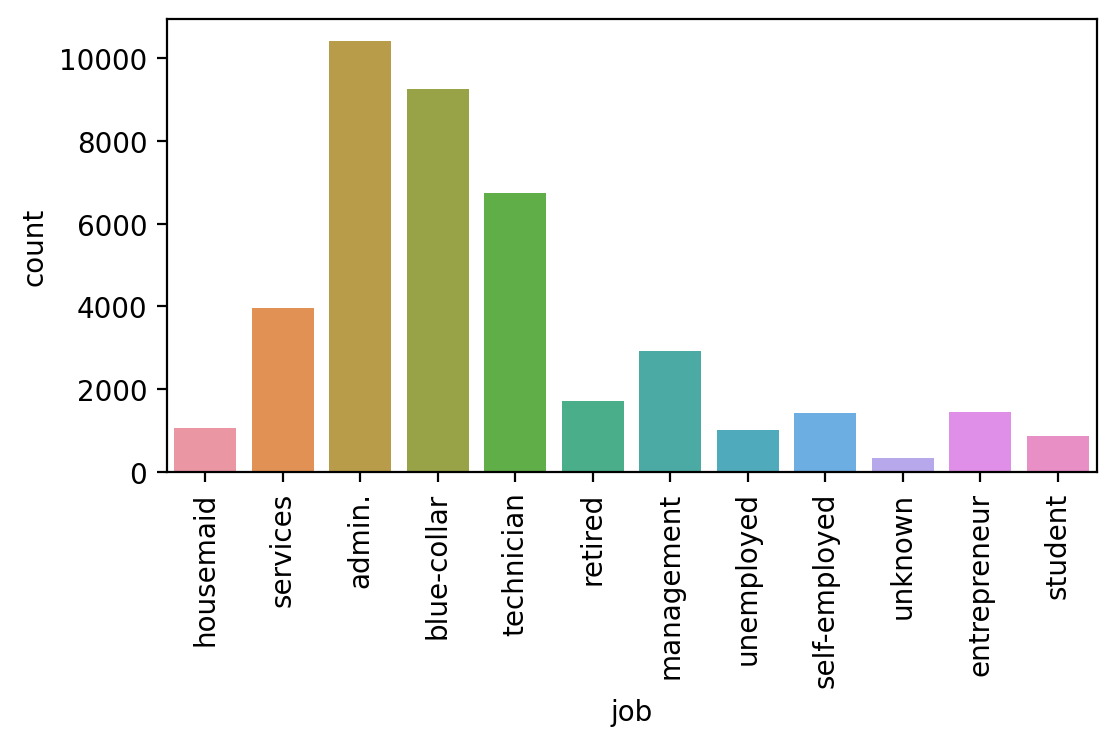

In [13]:
plt.figure(figsize=(6, 3), dpi=200)
sns.countplot(data=df, x='job')
plt.xticks(rotation=90);

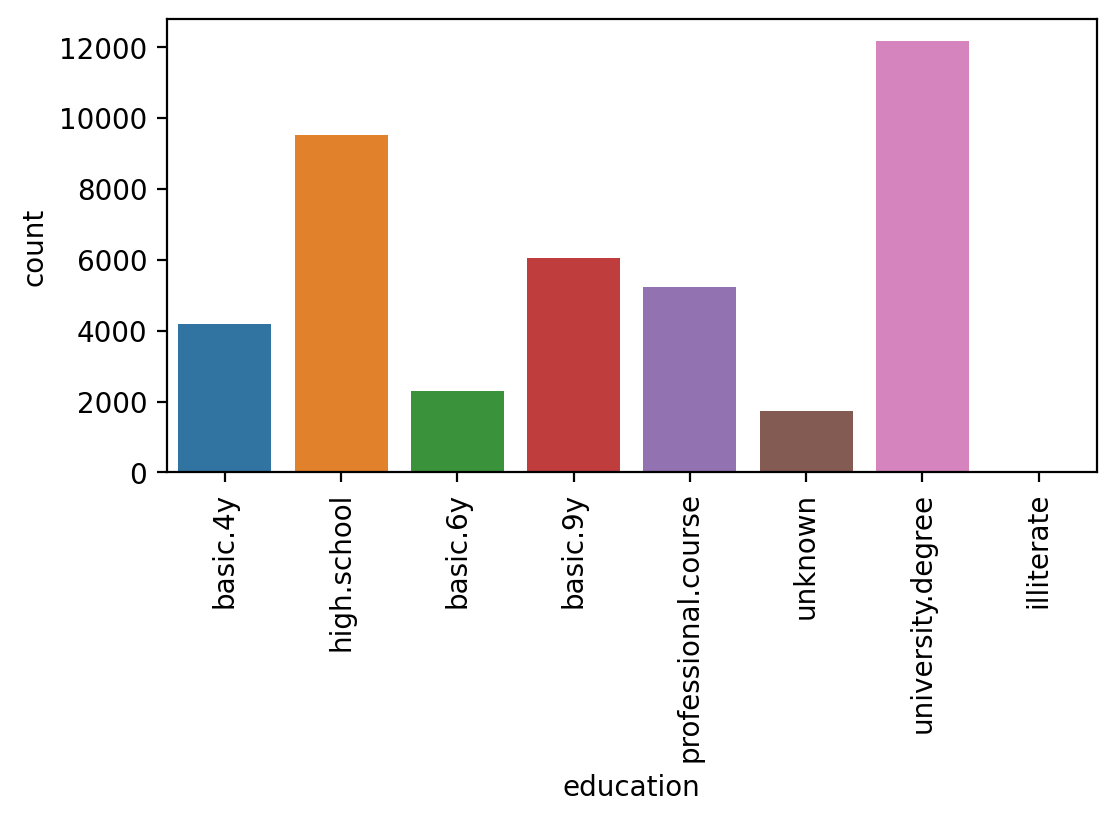

In [14]:
plt.figure(figsize=(6, 3), dpi=200)
sns.countplot(data=df, x='education')
plt.xticks(rotation=90);

În ceea ce privește partea de EDA pentru un algoritm de Unsupervised Learning, această parte se realizează aproape la fel în cadrul oricărui proiect, vizualizarea datelor este esențială pentru a găsi o anumită corelație între date și a observa anumite pattern-uri încă de la început. Urmează acuma partea în care o să începem să ne construim modelul.

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


În cadrul acestui set de date avem destul de multe coloane care sunt categorice, iar de aceste coloane în această formă nu ne putem utiliza deoarece după cum am spus, algoritmul de K-Means Clustering folosește distanțe pentru a prezica aparteneța datelor la un anumit cluster. Din acest motiv trebuie să creem acele dummy variables cu care ne-am mai întâlnit în acest curs. Putem să oferim ca și input la metoda de get_dummies() tot DataFrame-ul, nu avem ce să separăm deoarece nu există un label în acest set de date.

In [16]:
X = pd.get_dummies(df)

Pasul următor care trebuie făcut este să facem un scale la aceste date. Acest lucru trebuie făcut deoarece utilizând distanțe în cadrul acestui model nu dorim să avem un anumit feature care are un range mic de valori (de la 0 la 1) și un feature care are un range extrem de mare (care poate ajunge până la mii sau zeci de mii). Din acest motiv trebuie să facem scale la date.

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_scaled = scaler.fit_transform(X)

Putem utiliza fit_transform din prima deoarece în cadrul acestui set de date nu există conceptul de data leakeage deoarece nu mai avem set de date de antrenare și de testare. După ce am pregătit datele putem să importăm modelul de clusterizare și să îl folosim. Modelul se găsește în sklearn.cluster și poartă denumirea de KMeans

In [21]:
from sklearn.cluster import KMeans

In [22]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` observations (rows) at random from data
 |      for the i

Hyperparametrul cel mai important pentru acest model este cel de n_clusters prin care specificăm numărul de clustere pe care să îl creeze acest algoritm. Default valoarea acestui hyperparametru este setată la 8. Pentru început o să creem un model la care o să îi setăm valoarea 2 pentru acest hyperparametru. Nu putem ști dacă acest număr este cel mai potrivit pentru totalul de clustere, dar în ideea în care setul de date este despre o anumită perioadă de marketing, putem să zicem că împărțim acest set de date în persoane asuprara cărora dorim să facem marketing și asupra cărora nu dorim.

In [24]:
model = KMeans(n_clusters=2)

În secțiunea de Supervised Learning atunci când cream un model făceam fit la model pe datele de antrenare și predict pe cele de testare. Din moment ce acuma suntem la secțiunea de Unsupervised Learning și nu avem decât un set de date putem să facem acest operații într-o singură linie de cod utilizând metoda fit_predict(). Putem să facem asta deoarece pe același set de date o să și antrenăm și o să și facem predict, unde predict reprezintă doar o atribuire a datelor într-un cluster

In [25]:
cluster_labels = model.fit_predict(X_scaled)

In [26]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Ceea ce retunrează fit_predict() reprezintă un array unde fiecare element este reprezentat de clusterul din care face parte. Modelul a fost creat doar cu două clustere, iar valoarea 1 reprezintă un cluster dintre cele două, iar 0 reprezintă celălat cluster. Se poate observa faptul că primele trei valori din array sunt asignate la același cluster, iar ultimele la fel. Ceea ce este diferit la aceste modele este faptul că dacă se rulează metoda predict() de mai multe ori este posibil ca rezultatele să fie inversate. O să facem încercăm să obținem această inversare a datelor

In [29]:
cluster_labels2 = model.fit_predict(X_scaled)
cluster_labels2

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

După cum spuneam a apărut această inversare. Aceasta apare deoarece numelere 0 și 1 reprezintă doar label-ul pentru cluster, nu este o valoare fixă. Label-ul se modifică deoarece după cum știm, primele clustere sunt create alegând valori random din setul de date, iar în funcție de ce valori sunt alese prima dată este posibil ca aceste label-uri ale clusterelor să fie inversate. Putem să validăm faptul că avem aceleași valori în cluster dacă numărăm elementele din variabilele cluster_labels și cluster_labels_2

In [28]:
import collections

counter = collections.Counter(cluster_labels)
counter

Counter({1: 26870, 0: 14318})

In [30]:
counter = collections.Counter(cluster_labels2)
counter

Counter({0: 26870, 1: 14318})

Din datele de mai sus se poate confirma ceea ce am spus și anume faptul că acele valori sunt doar niște label-uri. În variabila 'cluster_labels' avem un număr de 26.870 de elemente din cluster-ul cu label-ul "1" și 14.318 de elemente din cluster-ul cu label-ul '0'. În cea de a doua variabilă avem un număt de 26.870 de elemente în cluster-ul cu label-ul '0'. Fiind același număr de valori, înseamnă că este același cluster, doar label-ul este diferit. Rezultatele pe care le-am obținut putem să le adăugăm acuma la setul de features cu care am lucrat

In [31]:
X['Cluster'] = cluster_labels

In [32]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1


În acest moment, acuma setul de date (X) are și o coloană care poate fi considerată ca și label. Apare acuma întrebarea de cum anume putem să interpretăm rezultatele pe care  le-am obținut? De exemplu am putea începe prin a face o corelație între datele pe care le avem și datele obținute

In [36]:
X.corr()['Cluster'].sort_values()

previous           -0.478467
poutcome_failure   -0.464295
contact_cellular   -0.410476
month_apr          -0.357923
subscribed_yes     -0.294610
                      ...   
cons.price.idx      0.679372
nr.employed         0.886155
emp.var.rate        0.932612
euribor3m           0.959297
Cluster             1.000000
Name: Cluster, Length: 66, dtype: float64

<AxesSubplot:>

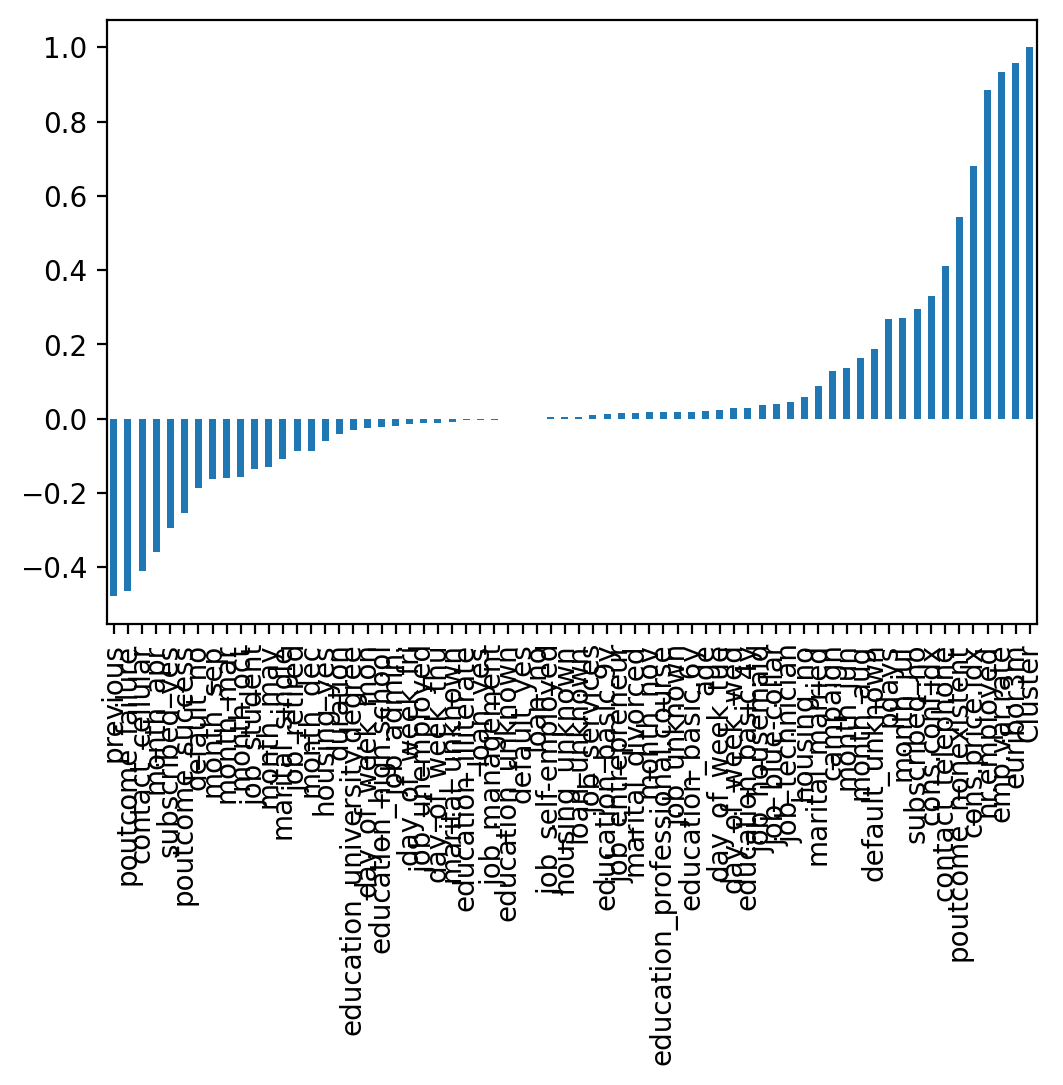

In [39]:
plt.figure(figsize=(6, 4), dpi=200)
X.corr()['Cluster'].sort_values().plot(kind='bar')

Având acuma acest valori și acest plot putem să vedem care features sunt corelate cu predicțiile de label (clustere) pe care le-a creat modelul și putem să mergem înspre o persoană din domeniul respectiv care să ne dea mai multe informații despre feature-urile care contează cel mai mult, sau chiar să ne spună cam ce ar reprezenta aceste două clustere pe care le avem în acest moment.

## Recapitulare

În cadrul acestei lecții am învățat următoarele lucruri:

    1. Datele cu care lucrăm nu pot să conțină coloane categorice, prin urmare trebuie să creem dummy variables

        X = pd.get_dummies(df)

    2. Pentru acele date dummies trebuie să facem scale la date

        from sklearn.preprocessing import StandardScaler

        scaler = StandardScaler()

        X_scaled = scaler.fit_transform(X)

        # Am putut să utilizăm direct fit_transform deoarece lucrăm doar cu Features, nu avem două seturi diferite de date, prin urmare nu putem face data leakeage deoarece nu avem la ce

    3. De unde să importăm modelul de K-Means Clustering

        from sklearn.cluster import KMeans

    4. Cum să creem un model de KMeans

        model = KMeans(n_clusters=2)

        # n_clusters reprezintă hyperparametrul prin care specificăm câte clustere să ne creeze acest algoritm

    5. Cum să antrenăm modelul și să facem predicții

        model.fit_predict(X_scaled)

        # Antrenarea și predict-ul se face pe același set de date, din acest motiv putem să utilizăm funcția fit_predict() care face atât train la model cât și predict la date.

        Rezultatul codului de mai sus este un array unde se specifică pentru fiecare date din ce cluster face parte